# Getting to Know PySpark

In [1]:
from pyspark.sql import SparkSession

In [2]:
sc = SparkSession.builder.appName("Basics").getOrCreate()

Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
24/02/03 17:44:03 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable


In [3]:
# Verify SparkContext
print(sc)

# Print Spark version
print(sc.version)

3.5.0


In [4]:
%%html
<!--The below HTML code shows PySpark dataframe output in horizontally scrollable format, -->
<!--instead of wrapping columns in the Jupyter notebook.-->
<!--The side effect of this is that some of the other single line outputs also doesn't wrap around.-->
<style>
div.jp-Cell-outputWrapper pre {
    white-space: pre;
}
</style>

## Using DataFrames
Spark's core data structure is the Resilient Distributed Dataset (RDD). This is a low level object that lets Spark work its magic by splitting data across multiple nodes in the cluster. However, RDDs are hard to work with directly, so in this course you'll be using the Spark DataFrame abstraction built on top of RDDs.

The Spark DataFrame was designed to behave a lot like a SQL table (a table with variables in the columns and observations in the rows). Not only are they easier to understand, DataFrames are also more optimized for complicated operations than RDDs.

When you start modifying and combining columns and rows of data, there are many ways to arrive at the same result, but some often take much longer than others. When using RDDs, it's up to the data scientist to figure out the right way to optimize the query, but the DataFrame implementation has much of this optimization built in!

To start working with Spark DataFrames, you first have to create a SparkSession object from your SparkContext. You can think of the SparkContext as your connection to the cluster and the SparkSession as your interface with that connection.



## Viewing Tables

In [5]:
# Import SparkSession from pyspark.sql
from pyspark.sql import SparkSession

# Create my_spark
my_spark = SparkSession.builder.getOrCreate()

# Print my_spark
print(my_spark)

In [6]:
spark = SparkSession.builder.getOrCreate()

In [7]:
 # Print the tables in the catalog
print(spark.catalog.listTables())

[]


## Query

In [8]:
flights = spark.read.csv("flights.csv", header=True)

In [9]:
flights.show()

24/02/03 17:44:08 WARN SparkStringUtils: Truncated the string representation of a plan since it was too large. This behavior can be adjusted by setting 'spark.sql.debug.maxToStringFields'.


+----+-----+---+-----------+-------+-------------+-----------+--------------+-------------------+-------------------+--------------+---------------+--------+----------+--------------+------------+--------+--------+---------+-------+-----------------+------------+-------------+--------+---------+-------------------+----------------+--------------+-------------+-------------------+-------------+
|YEAR|MONTH|DAY|DAY_OF_WEEK|AIRLINE|FLIGHT_NUMBER|TAIL_NUMBER|ORIGIN_AIRPORT|DESTINATION_AIRPORT|SCHEDULED_DEPARTURE|DEPARTURE_TIME|DEPARTURE_DELAY|TAXI_OUT|WHEELS_OFF|SCHEDULED_TIME|ELAPSED_TIME|AIR_TIME|DISTANCE|WHEELS_ON|TAXI_IN|SCHEDULED_ARRIVAL|ARRIVAL_TIME|ARRIVAL_DELAY|DIVERTED|CANCELLED|CANCELLATION_REASON|AIR_SYSTEM_DELAY|SECURITY_DELAY|AIRLINE_DELAY|LATE_AIRCRAFT_DELAY|WEATHER_DELAY|
+----+-----+---+-----------+-------+-------------+-----------+--------------+-------------------+-------------------+--------------+---------------+--------+----------+--------------+------------+--------+-

### Converting column names to lowercase

In [10]:
for col in flights.columns:
    flights = flights.withColumnRenamed(col, col.lower())

In [11]:
flights = (flights
                .withColumnRenamed('origin_airport', 'origin')
                .withColumnRenamed('destination_airport', 'dest')
                .withColumnRenamed('airline', 'carrier')
                .withColumnRenamed('tail_number', 'tailnum')
                .withColumnRenamed('departure_delay', 'dep_delay')
                .withColumnRenamed('arrival_delay', 'arr_delay'))

In [12]:
flights.createOrReplaceTempView('flights')

In [13]:
# Don't change this query
query = "FROM flights SELECT * LIMIT 10"

# Get the first 10 rows of flights
flights10 = spark.sql(query)

# Show the results
flights10.show()

+----+-----+---+-----------+-------+-------------+-------+------+----+-------------------+--------------+---------+--------+----------+--------------+------------+--------+--------+---------+-------+-----------------+------------+---------+--------+---------+-------------------+----------------+--------------+-------------+-------------------+-------------+
|year|month|day|day_of_week|carrier|flight_number|tailnum|origin|dest|scheduled_departure|departure_time|dep_delay|taxi_out|wheels_off|scheduled_time|elapsed_time|air_time|distance|wheels_on|taxi_in|scheduled_arrival|arrival_time|arr_delay|diverted|cancelled|cancellation_reason|air_system_delay|security_delay|airline_delay|late_aircraft_delay|weather_delay|
+----+-----+---+-----------+-------+-------------+-------+------+----+-------------------+--------------+---------+--------+----------+--------------+------------+--------+--------+---------+-------+-----------------+------------+---------+--------+---------+-------------------+-

## Pandafy a Spark DataFrame

In [1]:
# Don't change this query
query = "SELECT origin, dest, COUNT(*) as N FROM flights GROUP BY origin, dest"

# Run the query
flight_counts = spark.sql(query)

# Convert the results to a pandas DataFrame
pd_counts = flight_counts.toPandas()

# Print the head of pd_counts
print(pd_counts.head())

NameError: name 'spark' is not defined

## Put some Spark in your data


Convert a pandas dataframe to the Pyspark Dataframe

In [15]:
import pandas as pd
import numpy as np

In [16]:
# Create pd_temp
pd_temp = pd.DataFrame(np.random.random(10))

# Create spark_temp from pd_temp
spark_temp = spark.createDataFrame(pd_temp)

# Examine the tables in the catalog
print(spark.catalog.listTables())

# Add spark_temp to the catalog
spark_temp.createOrReplaceTempView('temp')

# Examine the tables in the catalog again
print(spark.catalog.listTables())

/Users/s0a067b/anaconda3/envs/pg_env/lib/python3.9/site-packages/pyspark/sql/pandas/conversion.py:485: FutureWarning: is_datetime64tz_dtype is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.DatetimeTZDtype)` instead.
  if should_localize and is_datetime64tz_dtype(s.dtype) and s.dt.tz is not None:


[Table(name='flights', catalog=None, namespace=[], description=None, tableType='TEMPORARY', isTemporary=True)]
[Table(name='flights', catalog=None, namespace=[], description=None, tableType='TEMPORARY', isTemporary=True), Table(name='temp', catalog=None, namespace=[], description=None, tableType='TEMPORARY', isTemporary=True)]


## Droppng the middle man


In [17]:
# Don't change this file path
file_path = "airports.csv"

# Read in the airports data
airports = spark.read.csv(file_path, header=True)

# Show the data
airports.show()

+---+--------------------+------------------+-------------------+----+---+---+-------------------+
|faa|                name|               lat|                lon| alt| tz|dst|              tzone|
+---+--------------------+------------------+-------------------+----+---+---+-------------------+
|04G|   Lansdowne Airport|        41.1304722|        -80.6195833|1044| -5|  A|   America/New_York|
|06A|Moton Field Munic...|        32.4605722|        -85.6800278| 264| -6|  A|    America/Chicago|
|06C| Schaumburg Regional|        41.9893408|        -88.1012428| 801| -6|  A|    America/Chicago|
|06N|     Randall Airport|         41.431912|        -74.3915611| 523| -5|  A|   America/New_York|
|09J|Jekyll Island Air...|        31.0744722|        -81.4277778|  11| -5|  A|   America/New_York|
|0A9|Elizabethton Muni...|        36.3712222|        -82.1734167|1593| -5|  A|   America/New_York|
|0G6|Williams County A...|        41.4673056|        -84.5067778| 730| -5|  A|   America/New_York|
|0G7|Finge

In [18]:
for col in airports.columns:
    airports = airports.withColumnRenamed(col, col.lower())

In [19]:
airports.show()

+---+--------------------+------------------+-------------------+----+---+---+-------------------+
|faa|                name|               lat|                lon| alt| tz|dst|              tzone|
+---+--------------------+------------------+-------------------+----+---+---+-------------------+
|04G|   Lansdowne Airport|        41.1304722|        -80.6195833|1044| -5|  A|   America/New_York|
|06A|Moton Field Munic...|        32.4605722|        -85.6800278| 264| -6|  A|    America/Chicago|
|06C| Schaumburg Regional|        41.9893408|        -88.1012428| 801| -6|  A|    America/Chicago|
|06N|     Randall Airport|         41.431912|        -74.3915611| 523| -5|  A|   America/New_York|
|09J|Jekyll Island Air...|        31.0744722|        -81.4277778|  11| -5|  A|   America/New_York|
|0A9|Elizabethton Muni...|        36.3712222|        -82.1734167|1593| -5|  A|   America/New_York|
|0G6|Williams County A...|        41.4673056|        -84.5067778| 730| -5|  A|   America/New_York|
|0G7|Finge

In [20]:
flights.show()

+----+-----+---+-----------+-------+-------------+-------+------+----+-------------------+--------------+---------+--------+----------+--------------+------------+--------+--------+---------+-------+-----------------+------------+---------+--------+---------+-------------------+----------------+--------------+-------------+-------------------+-------------+
|year|month|day|day_of_week|carrier|flight_number|tailnum|origin|dest|scheduled_departure|departure_time|dep_delay|taxi_out|wheels_off|scheduled_time|elapsed_time|air_time|distance|wheels_on|taxi_in|scheduled_arrival|arrival_time|arr_delay|diverted|cancelled|cancellation_reason|air_system_delay|security_delay|airline_delay|late_aircraft_delay|weather_delay|
+----+-----+---+-----------+-------+-------------+-------+------+----+-------------------+--------------+---------+--------+----------+--------------+------------+--------+--------+---------+-------+-----------------+------------+---------+--------+---------+-------------------+-

# Manipulating data

## Creating Columns

In [21]:
# Create the DataFrame flights
flights = spark.table("flights")

# Show the head
flights.show()

# Add duration_hrs
flights = flights.withColumn("duration_hrs", flights.air_time/60)

+----+-----+---+-----------+-------+-------------+-------+------+----+-------------------+--------------+---------+--------+----------+--------------+------------+--------+--------+---------+-------+-----------------+------------+---------+--------+---------+-------------------+----------------+--------------+-------------+-------------------+-------------+
|year|month|day|day_of_week|carrier|flight_number|tailnum|origin|dest|scheduled_departure|departure_time|dep_delay|taxi_out|wheels_off|scheduled_time|elapsed_time|air_time|distance|wheels_on|taxi_in|scheduled_arrival|arrival_time|arr_delay|diverted|cancelled|cancellation_reason|air_system_delay|security_delay|airline_delay|late_aircraft_delay|weather_delay|
+----+-----+---+-----------+-------+-------------+-------+------+----+-------------------+--------------+---------+--------+----------+--------------+------------+--------+--------+---------+-------+-----------------+------------+---------+--------+---------+-------------------+-

In [22]:
flights.show()

+----+-----+---+-----------+-------+-------------+-------+------+----+-------------------+--------------+---------+--------+----------+--------------+------------+--------+--------+---------+-------+-----------------+------------+---------+--------+---------+-------------------+----------------+--------------+-------------+-------------------+-------------+------------------+
|year|month|day|day_of_week|carrier|flight_number|tailnum|origin|dest|scheduled_departure|departure_time|dep_delay|taxi_out|wheels_off|scheduled_time|elapsed_time|air_time|distance|wheels_on|taxi_in|scheduled_arrival|arrival_time|arr_delay|diverted|cancelled|cancellation_reason|air_system_delay|security_delay|airline_delay|late_aircraft_delay|weather_delay|      duration_hrs|
+----+-----+---+-----------+-------+-------------+-------+------+----+-------------------+--------------+---------+--------+----------+--------------+------------+--------+--------+---------+-------+-----------------+------------+---------+--

## Filtering Data

In [23]:
# Filter flights by passing a string
long_flights1 = flights.filter("distance > 1000")

# Filter flights by passing a column of boolean values
long_flights2 = flights.filter(flights.distance > 1000)

# Print the data to check they're equal
long_flights1.show()
long_flights2.show()

+----+-----+---+-----------+-------+-------------+-------+------+----+-------------------+--------------+---------+--------+----------+--------------+------------+--------+--------+---------+-------+-----------------+------------+---------+--------+---------+-------------------+----------------+--------------+-------------+-------------------+-------------+------------------+
|year|month|day|day_of_week|carrier|flight_number|tailnum|origin|dest|scheduled_departure|departure_time|dep_delay|taxi_out|wheels_off|scheduled_time|elapsed_time|air_time|distance|wheels_on|taxi_in|scheduled_arrival|arrival_time|arr_delay|diverted|cancelled|cancellation_reason|air_system_delay|security_delay|airline_delay|late_aircraft_delay|weather_delay|      duration_hrs|
+----+-----+---+-----------+-------+-------------+-------+------+----+-------------------+--------------+---------+--------+----------+--------------+------------+--------+--------+---------+-------+-----------------+------------+---------+--

## Selecting

In [24]:
# Select the first set of columns
selected1 = flights.select("tailnum", "origin", "dest")

# Select the second set of columns
temp = flights.select(flights.origin, flights.dest, flights.carrier)

# Define first filter
filterA = flights.origin == "SEA"

# Define second filter
filterB = flights.dest == "PDX"

# Filter the data, first by filterA then by filterB
selected2 = temp.filter(filterA).filter(filterB)

## Selecting II

In [25]:
# Define avg_speed
avg_speed = (flights.distance/(flights.air_time/60)).alias("avg_speed")

# Select the correct columns
speed1 = flights.select("origin", "dest", "tailnum", avg_speed)

# Create the same table using a SQL expression
speed2 = flights.selectExpr("origin", "dest", "tailnum", "distance/(air_time/60) as avg_speed")

### Showing the Avg Speed Column

In [26]:
flights.select(avg_speed).show()

+------------------+
|         avg_speed|
+------------------+
| 514.0828402366864|
| 531.5589353612166|
| 517.8947368421052|
| 544.6511627906978|
| 436.5829145728643|
|462.81553398058253|
| 506.1038961038961|
| 559.2105263157895|
| 507.7456647398844|
| 563.5483870967741|
| 540.9022556390977|
| 548.0672268907563|
| 489.8936170212766|
| 542.0454545454546|
|505.66265060240966|
|502.19653179190755|
| 508.0701754385965|
|  492.964824120603|
|494.75935828877004|
|500.35087719298247|
+------------------+
only showing top 20 rows



In [27]:
avg_speed_ = flights.select(avg_speed).collect()

In [28]:
type(avg_speed_)

list

In [29]:
avg_speed_[:10]

[Row(avg_speed=514.0828402366864),
 Row(avg_speed=531.5589353612166),
 Row(avg_speed=517.8947368421052),
 Row(avg_speed=544.6511627906978),
 Row(avg_speed=436.5829145728643),
 Row(avg_speed=462.81553398058253),
 Row(avg_speed=506.1038961038961),
 Row(avg_speed=559.2105263157895),
 Row(avg_speed=507.7456647398844),
 Row(avg_speed=563.5483870967741)]

In [30]:
import matplotlib.pyplot as plt

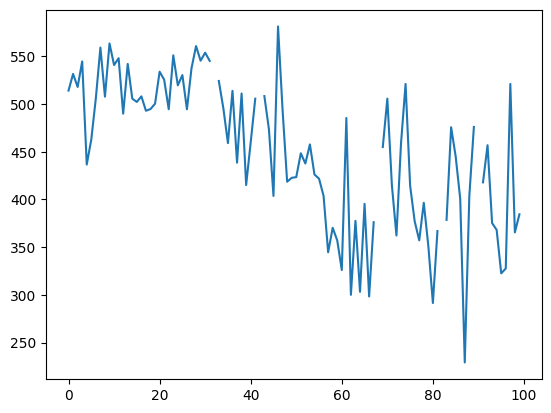

In [31]:
plt.plot(avg_speed_[:100])

## Aggregating

In [32]:
flights.printSchema()

root
 |-- year: string (nullable = true)
 |-- month: string (nullable = true)
 |-- day: string (nullable = true)
 |-- day_of_week: string (nullable = true)
 |-- carrier: string (nullable = true)
 |-- flight_number: string (nullable = true)
 |-- tailnum: string (nullable = true)
 |-- origin: string (nullable = true)
 |-- dest: string (nullable = true)
 |-- scheduled_departure: string (nullable = true)
 |-- departure_time: string (nullable = true)
 |-- dep_delay: string (nullable = true)
 |-- taxi_out: string (nullable = true)
 |-- wheels_off: string (nullable = true)
 |-- scheduled_time: string (nullable = true)
 |-- elapsed_time: string (nullable = true)
 |-- air_time: string (nullable = true)
 |-- distance: string (nullable = true)
 |-- wheels_on: string (nullable = true)
 |-- taxi_in: string (nullable = true)
 |-- scheduled_arrival: string (nullable = true)
 |-- arrival_time: string (nullable = true)
 |-- arr_delay: string (nullable = true)
 |-- diverted: string (nullable = true)
 |-

In [42]:
flights = flights.withColumn('distance', flights.distance.cast('float'))
flights = flights.withColumn('air_time', flights['air_time'].cast('float'))
flights = flights.withColumn('dep_delay', flights['dep_delay'].cast('float'))

In [43]:
# Find the shortest flight from PDX in terms of distance
flights.filter(flights.origin == "PDX").groupBy().min("distance").show()

# Find the longest flight from SEA in terms of air time
flights.filter(flights.origin == "SEA").groupBy().max("air_time").show()

+-------------+
|min(distance)|
+-------------+
|        129.0|
+-------------+



+-------------+
|max(air_time)|
+-------------+
|        412.0|
+-------------+



## Aggregating II

In [44]:
# Average duration of Delta flights
flights.filter(flights.origin == "SEA").filter(flights.carrier == "DL").groupBy().avg("air_time").show()

# Total hours in the air
flights.withColumn("duration_hrs", flights.air_time/60).groupBy().sum("duration_hrs").show()

+-----------------+
|    avg(air_time)|
+-----------------+
|192.3077150895898|
+-----------------+



+--------------------+
|   sum(duration_hrs)|
+--------------------+
|1.0810105849999808E7|
+--------------------+



## Grouping and Aggregating I

In [45]:
# Group by tailnum
by_plane = flights.groupBy("tailnum")

# Number of flights each plane made
by_plane.count().show()

# Group by origin
by_origin = flights.groupBy("origin")

# Average duration of flights from PDX and SEA
by_origin.avg("air_time").show()

+-------+-----+
|tailnum|count|
+-------+-----+
| N38451|  946|
| N567AA| 1458|
| N623NK| 1669|
| N442AS| 1210|
| N902DE| 1704|
| N4YUAA| 1290|
| N466SW| 1942|
| N516UA|  439|
| N866AS| 2397|
| N499AA| 1292|
| N36472|  970|
| N3CWAA|  998|
| N8322X| 1567|
| N102UW| 1263|
| N3AEMQ| 1619|
|  N6700| 1035|
| N954WN| 2087|
| N388DA|  917|
| N396AA|  145|
| N369NB| 1351|
+-------+-----+
only showing top 20 rows



+------+------------------+
|origin|     avg(air_time)|
+------+------------------+
|   BGM|  65.7915057915058|
|   PSE|182.11517615176152|
|   INL|31.967625899280577|
|   MSY|102.93938681708973|
|   PPG|  309.188679245283|
|   GEG| 84.57923728813559|
|   SNA|106.89280265882097|
|   BUR| 68.00404814594916|
|   GRB|48.289618644067794|
|   GTF| 83.24794238683127|
|   IDA| 49.87191011235955|
|   GRR| 74.65268949815008|
|   JLN| 59.12400635930047|
|   EUG| 89.50393479482855|
|   PSG| 19.75920245398773|
|   GSO| 74.43670690188796|
|   PVD|114.32044250255647|
|   MYR| 75.71513227513228|
|   OAK| 98.28575199788811|
|   MSN| 66.39796149490374|
+------+------------------+
only showing top 20 rows



## Grouping and Aggregating II

In [46]:
flights.printSchema()

root
 |-- year: string (nullable = true)
 |-- month: string (nullable = true)
 |-- day: string (nullable = true)
 |-- day_of_week: string (nullable = true)
 |-- carrier: string (nullable = true)
 |-- flight_number: string (nullable = true)
 |-- tailnum: string (nullable = true)
 |-- origin: string (nullable = true)
 |-- dest: string (nullable = true)
 |-- scheduled_departure: string (nullable = true)
 |-- departure_time: string (nullable = true)
 |-- dep_delay: float (nullable = true)
 |-- taxi_out: string (nullable = true)
 |-- wheels_off: string (nullable = true)
 |-- scheduled_time: string (nullable = true)
 |-- elapsed_time: string (nullable = true)
 |-- air_time: float (nullable = true)
 |-- distance: float (nullable = true)
 |-- wheels_on: string (nullable = true)
 |-- taxi_in: string (nullable = true)
 |-- scheduled_arrival: string (nullable = true)
 |-- arrival_time: string (nullable = true)
 |-- arr_delay: string (nullable = true)
 |-- diverted: string (nullable = true)
 |-- c

In [47]:
# Import pyspark.sql.functions as F
import pyspark.sql.functions as F

# Group by month and dest
by_month_dest = flights.groupBy('month', 'dest')

# Average departure delay by month and destination
by_month_dest.avg('dep_delay').show()

# Standard deviation of departure delay
by_month_dest.agg(F.stddev('dep_delay')).show()

+-----+----+------------------+
|month|dest|    avg(dep_delay)|
+-----+----+------------------+
|    1| BNA|10.161258112830755|
|    1| PNS| 8.226837060702875|
|    1| BTV|14.570815450643776|
|    1| PIB| 2.150943396226415|
|    2| LIT|11.875328083989501|
|    2| CAE|14.589130434782609|
|    2| HRL|1.9461538461538461|
|    2| ERI|16.942028985507246|
|    2| LAR|15.020833333333334|
|    1| PDX| 7.575573362807406|
|    1| MEI| 13.80952380952381|
|    1| BUR|  7.50930930930931|
|    1| ABE| 4.044585987261146|
|    2| LRD| 2.611764705882353|
|    2| YAK| -2.30188679245283|
|    1| AVP| 10.26086956521739|
|    1| PSE|  6.47887323943662|
|    2| TUS|  9.44286781179985|
|    1| CID|18.482059282371296|
|    1| ACV| 12.73793103448276|
+-----+----+------------------+
only showing top 20 rows



+-----+----+------------------+
|month|dest| stddev(dep_delay)|
+-----+----+------------------+
|    1| BNA|31.602603549800648|
|    1| PNS|32.538857733789776|
|    1| BTV| 37.15525915024453|
|    1| PIB|33.011301227129366|
|    2| LIT|28.742939627103745|
|    2| CAE|38.887003100463474|
|    2| HRL| 17.21376460027532|
|    2| ERI| 43.98491855771202|
|    2| LAR| 34.91843967129708|
|    1| PDX|  33.1545540716458|
|    1| MEI|48.380638413155374|
|    1| BUR|24.786250958989065|
|    1| ABE|21.109101193392366|
|    2| LRD| 16.65315800152028|
|    2| YAK| 23.03891766426504|
|    1| AVP| 26.97890239939016|
|    1| PSE|20.759754440420522|
|    2| TUS|30.967826249537236|
|    1| CID| 38.95165360100559|
|    1| ACV|  43.2484779259557|
+-----+----+------------------+
only showing top 20 rows



In [48]:
airports.show()

+---+--------------------+------------------+-------------------+----+---+---+-------------------+
|faa|                name|               lat|                lon| alt| tz|dst|              tzone|
+---+--------------------+------------------+-------------------+----+---+---+-------------------+
|04G|   Lansdowne Airport|        41.1304722|        -80.6195833|1044| -5|  A|   America/New_York|
|06A|Moton Field Munic...|        32.4605722|        -85.6800278| 264| -6|  A|    America/Chicago|
|06C| Schaumburg Regional|        41.9893408|        -88.1012428| 801| -6|  A|    America/Chicago|
|06N|     Randall Airport|         41.431912|        -74.3915611| 523| -5|  A|   America/New_York|
|09J|Jekyll Island Air...|        31.0744722|        -81.4277778|  11| -5|  A|   America/New_York|
|0A9|Elizabethton Muni...|        36.3712222|        -82.1734167|1593| -5|  A|   America/New_York|
|0G6|Williams County A...|        41.4673056|        -84.5067778| 730| -5|  A|   America/New_York|
|0G7|Finge

## Joining II

In [49]:
# Examine the data
print(airports.show())

# Rename the faa column
airports = airports.withColumnRenamed('faa', 'dest')

# Join the DataFrames
flights_with_airports = flights.join(airports, on = 'dest', how = 'leftouter')

# Examine the new DataFrame
print(flights_with_airports.show())

+---+--------------------+------------------+-------------------+----+---+---+-------------------+
|faa|                name|               lat|                lon| alt| tz|dst|              tzone|
+---+--------------------+------------------+-------------------+----+---+---+-------------------+
|04G|   Lansdowne Airport|        41.1304722|        -80.6195833|1044| -5|  A|   America/New_York|
|06A|Moton Field Munic...|        32.4605722|        -85.6800278| 264| -6|  A|    America/Chicago|
|06C| Schaumburg Regional|        41.9893408|        -88.1012428| 801| -6|  A|    America/Chicago|
|06N|     Randall Airport|         41.431912|        -74.3915611| 523| -5|  A|   America/New_York|
|09J|Jekyll Island Air...|        31.0744722|        -81.4277778|  11| -5|  A|   America/New_York|
|0A9|Elizabethton Muni...|        36.3712222|        -82.1734167|1593| -5|  A|   America/New_York|
|0G6|Williams County A...|        41.4673056|        -84.5067778| 730| -5|  A|   America/New_York|
|0G7|Finge

# Getting started with machine learning pipelines


## Machine Learning Pipelines
In the next two chapters you'll step through every stage of the machine learning pipeline, from data intake to model evaluation. Let's get to it!

At the core of the pyspark.ml module are the Transformer and Estimator classes. Almost every other class in the module behaves similarly to these two basic classes.

Transformer classes have a .transform() method that takes a DataFrame and returns a new DataFrame; usually the original one with a new column appended. For example, you might use the class Bucketizer to create discrete bins from a continuous feature or the class PCA to reduce the dimensionality of your dataset using principal component analysis.

Estimator classes all implement a .fit() method. These methods also take a DataFrame, but instead of returning another DataFrame they return a model object. This can be something like a StringIndexerModel for including categorical data saved as strings in your models, or a RandomForestModel that uses the random forest algorithm for classification or regression.



In [50]:
planes = spark.read.csv("planes.csv", header=True)

In [51]:
planes.show()

+-------+----+--------------------+----------------+---------+-------+-----+-----+---------+
|tailnum|year|                type|    manufacturer|    model|engines|seats|speed|   engine|
+-------+----+--------------------+----------------+---------+-------+-----+-----+---------+
| N10156|2004|Fixed wing multi ...|         EMBRAER|EMB-145XR|      2|   55|   NA|Turbo-fan|
| N102UW|1998|Fixed wing multi ...|AIRBUS INDUSTRIE| A320-214|      2|  182|   NA|Turbo-fan|
| N103US|1999|Fixed wing multi ...|AIRBUS INDUSTRIE| A320-214|      2|  182|   NA|Turbo-fan|
| N104UW|1999|Fixed wing multi ...|AIRBUS INDUSTRIE| A320-214|      2|  182|   NA|Turbo-fan|
| N10575|2002|Fixed wing multi ...|         EMBRAER|EMB-145LR|      2|   55|   NA|Turbo-fan|
| N105UW|1999|Fixed wing multi ...|AIRBUS INDUSTRIE| A320-214|      2|  182|   NA|Turbo-fan|
| N107US|1999|Fixed wing multi ...|AIRBUS INDUSTRIE| A320-214|      2|  182|   NA|Turbo-fan|
| N108UW|1999|Fixed wing multi ...|AIRBUS INDUSTRIE| A320-214|      2|

In [54]:
planes.groupBy('tailnum').agg(F.count('*').alias('ct')).select('ct').distinct().show()

+---+
| ct|
+---+
|  1|
+---+



## Join the DataFrames

In [55]:
# Rename year column
planes = planes.withColumnRenamed('year', 'plane_year')

# Join the DataFrames
model_data = flights.join(planes, on='tailnum', how="leftouter")

In [56]:
model_data.show()

+-------+----+-----+---+-----------+-------+-------------+------+----+-------------------+--------------+---------+--------+----------+--------------+------------+--------+--------+---------+-------+-----------------+------------+---------+--------+---------+-------------------+----------------+--------------+-------------+-------------------+-------------+------------------+----------+--------------------+-----------------+---------+-------+-----+-----+---------+
|tailnum|year|month|day|day_of_week|carrier|flight_number|origin|dest|scheduled_departure|departure_time|dep_delay|taxi_out|wheels_off|scheduled_time|elapsed_time|air_time|distance|wheels_on|taxi_in|scheduled_arrival|arrival_time|arr_delay|diverted|cancelled|cancellation_reason|air_system_delay|security_delay|airline_delay|late_aircraft_delay|weather_delay|      duration_hrs|plane_year|                type|     manufacturer|    model|engines|seats|speed|   engine|
+-------+----+-----+---+-----------+-------+-------------+----

## Data types
Good work! Before you get started modeling, it's important to know that Spark only handles numeric data. That means all of the columns in your DataFrame must be either integers or decimals (called 'doubles' in Spark).

When we imported our data, we let Spark guess what kind of information each column held. Unfortunately, Spark doesn't always guess right and you can see that some of the columns in our DataFrame are strings containing numbers as opposed to actual numeric values.

To remedy this, you can use the .cast() method in combination with the .withColumn() method. It's important to note that .cast() works on columns, while .withColumn() works on DataFrames.

The only argument you need to pass to .cast() is the kind of value you want to create, in string form. For example, to create integers, you'll pass the argument "integer" and for decimal numbers you'll use "double".

You can put this call to .cast() inside a call to .withColumn() to overwrite the already existing column, just like you did in the previous chapter!

In [57]:
# Cast the columns to integers
model_data = model_data.withColumn("arr_delay", model_data.arr_delay.cast('integer'))
model_data = model_data.withColumn("air_time", model_data.air_time.cast('integer'))
model_data = model_data.withColumn("month", model_data.month.cast('integer'))
model_data = model_data.withColumn("plane_year", model_data.plane_year.cast('integer'))

## Create a new Column

In [58]:
# Create the column plane_age
model_data = model_data.withColumn("plane_age", model_data.year - model_data.plane_year)

In [59]:
model_data.show()

+-------+----+-----+---+-----------+-------+-------------+------+----+-------------------+--------------+---------+--------+----------+--------------+------------+--------+--------+---------+-------+-----------------+------------+---------+--------+---------+-------------------+----------------+--------------+-------------+-------------------+-------------+------------------+----------+--------------------+-----------------+---------+-------+-----+-----+---------+---------+
|tailnum|year|month|day|day_of_week|carrier|flight_number|origin|dest|scheduled_departure|departure_time|dep_delay|taxi_out|wheels_off|scheduled_time|elapsed_time|air_time|distance|wheels_on|taxi_in|scheduled_arrival|arrival_time|arr_delay|diverted|cancelled|cancellation_reason|air_system_delay|security_delay|airline_delay|late_aircraft_delay|weather_delay|      duration_hrs|plane_year|                type|     manufacturer|    model|engines|seats|speed|   engine|plane_age|
+-------+----+-----+---+-----------+------

## Making a Boolean


In [60]:
# Create is_late
model_data = model_data.withColumn("is_late", model_data.arr_delay > 0)

# Convert to an integer
model_data = model_data.withColumn("label", model_data.is_late.cast('integer'))

# Remove missing values
model_data = model_data.filter("arr_delay is not NULL and dep_delay is not NULL and air_time is not NULL and plane_year is not NULL")

In [61]:
model_data.show()

+-------+----+-----+---+-----------+-------+-------------+------+----+-------------------+--------------+---------+--------+----------+--------------+------------+--------+--------+---------+-------+-----------------+------------+---------+--------+---------+-------------------+----------------+--------------+-------------+-------------------+-------------+------------------+----------+--------------------+-----------------+---------+-------+-----+-----+---------+---------+-------+-----+
|tailnum|year|month|day|day_of_week|carrier|flight_number|origin|dest|scheduled_departure|departure_time|dep_delay|taxi_out|wheels_off|scheduled_time|elapsed_time|air_time|distance|wheels_on|taxi_in|scheduled_arrival|arrival_time|arr_delay|diverted|cancelled|cancellation_reason|air_system_delay|security_delay|airline_delay|late_aircraft_delay|weather_delay|      duration_hrs|plane_year|                type|     manufacturer|    model|engines|seats|speed|   engine|plane_age|is_late|label|
+-------+----+

## Carrier

In [62]:
from pyspark.ml.feature import StringIndexer, OneHotEncoder, VectorAssembler

In [63]:
# Create a StringIndexer
carr_indexer = StringIndexer(inputCol = 'carrier', outputCol = 'carrier_index')

# Create a OneHotEncoder
carr_encoder = OneHotEncoder(inputCol="carrier_index", outputCol="carrier_fact")

## Destination

In [64]:
# Create a StringIndexer
dest_indexer = StringIndexer(inputCol="dest", outputCol="dest_index")

# Create a OneHotEncoder
dest_encoder = OneHotEncoder(inputCol='dest_index', outputCol='dest_fact')

## Assemble a vector


In [65]:
# Make a VectorAssembler
vec_assembler = VectorAssembler(inputCols=["month", "air_time", "carrier_fact", "dest_fact", "plane_age"], outputCol='features')

## Create the pipeline

In [66]:
# Import Pipeline
from pyspark.ml import Pipeline

# Make the pipeline
flights_pipe = Pipeline(stages=[dest_indexer, dest_encoder, carr_indexer, carr_encoder, vec_assembler])

## Transform the data

In [67]:
piped_data = flights_pipe.fit(model_data).transform(model_data)

In [68]:
piped_data.show()

+-------+----+-----+---+-----------+-------+-------------+------+----+-------------------+--------------+---------+--------+----------+--------------+------------+--------+--------+---------+-------+-----------------+------------+---------+--------+---------+-------------------+----------------+--------------+-------------+-------------------+-------------+------------------+----------+--------------------+-----------------+---------+-------+-----+-----+---------+---------+-------+-----+----------+----------------+-------------+--------------+--------------------+
|tailnum|year|month|day|day_of_week|carrier|flight_number|origin|dest|scheduled_departure|departure_time|dep_delay|taxi_out|wheels_off|scheduled_time|elapsed_time|air_time|distance|wheels_on|taxi_in|scheduled_arrival|arrival_time|arr_delay|diverted|cancelled|cancellation_reason|air_system_delay|security_delay|airline_delay|late_aircraft_delay|weather_delay|      duration_hrs|plane_year|                type|     manufacturer| 

## Split the Data

In [69]:
# Split the data into training and test sets
training, test = piped_data.randomSplit([.6,.4])

# Model tuning and selection


## Create the modeler


In [70]:
# Import LogisticRegression
from pyspark.ml.classification import LogisticRegression

# Create a LogisticRegression Estimator
lr = LogisticRegression()

## Create the evaluator

In [71]:
# Import the evaluation submodule
import pyspark.ml.evaluation as evals

# Create a BinaryClassificationEvaluator
evaluator = evals.BinaryClassificationEvaluator(metricName='areaUnderROC')

## Make a grid

In [72]:
# Import the tuning submodule
import pyspark.ml.tuning as tune

# Create the parameter grid
grid = tune.ParamGridBuilder()

# Add the hyperparameter
grid = grid.addGrid(lr.regParam, np.arange(0, .1, .01))
grid = grid.addGrid(lr.elasticNetParam, [0,1])

# Build the grid
grid = grid.build()

## Make the Validator

In [73]:
# Create the CrossValidator
cv = tune.CrossValidator(estimator=lr,
               estimatorParamMaps=grid,
               evaluator=evaluator
               )

## Fit the model(s)

In [74]:
# # Fit cross validation models
# models = cv.fit(training)

# # Extract the best model
# best_lr = models.bestModel

In [75]:
# Call lr.fit()
best_lr = lr.fit(training)

# Print best_lr
print(best_lr)

24/02/03 17:46:36 WARN InstanceBuilder: Failed to load implementation from:dev.ludovic.netlib.blas.JNIBLAS


LogisticRegressionModel: uid=LogisticRegression_c5f6708eb951, numClasses=2, numFeatures=574


## Evaluate the model


In [76]:
# Use the model to predict the test set
test_results = best_lr.transform(test)

# Evaluate the predictions
print(evaluator.evaluate(test_results))

0.5727635308891611
